### Загрузка данных

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
param25 = pd.read_csv(r"param25.csv")
param26 = pd.read_csv(r"param26.csv")
param27 = pd.read_csv(r"param27.csv")
param28 = pd.read_csv(r"param28.csv")
param29 = pd.read_csv(r"param29.csv")
param25.drop(columns='Номер п/п', inplace=True)
param26.drop(columns='Номер п/п', inplace=True)
param27.drop(columns='Номер п/п', inplace=True)
param28.drop(columns='Номер п/п', inplace=True)
param29.drop(columns='Номер п/п', inplace=True)
param25['Год'] = 2025
param26['Год'] = 2026
param27['Год'] = 2027
param28['Год'] = 2028
param29['Год'] = 2029
param_all = pd.concat([param25, param26, param27, param28, param29], ignore_index=True)

param_all['МК'] = (
    param_all['МК']
    .replace({'\xa0': '0'})  # Заменяем неразрывный пробел на "0"
    .fillna('0')  # Заполняем пропущенные значения "0"
    .astype(int)  # Преобразуем в `int`
)
param_all['СК'] = (
    param_all['СК']
    .replace({'\xa0': '0'})  # Заменяем неразрывный пробел на "0"
    .fillna('0')  # Заполняем пропущенные значения "0"
    .astype(int)  # Преобразуем в `int`
)
param_all['БК'] = (
    param_all['БК']
    .replace({'\xa0': '0'})  # Заменяем неразрывный пробел на "0"
    .fillna('0')  # Заполняем пропущенные значения "0"
    .astype(int)  # Преобразуем в `int`
)
param_all['ОБК'] = (
    param_all['ОБК']
    .replace({'\xa0': '0'})  # Заменяем неразрывный пробел на "0"
    .fillna('0')  # Заполняем пропущенные значения "0"
    .astype(int)  # Преобразуем в `int`
)


### Расчет показателей

#### Средняя скоррость

In [50]:
def calculate_mean_speed():
    param_all['Средняя скорость, км/ч'] = param_all['Протяженность маршрута (туда и обратно), км'] / param_all['Всего'] / param_all['Минимальный интервал движения, мин'] * 60

calculate_mean_speed()
param_all.head()

,Маршрут,Тип,Наименование маршрута регулярных перевозок,МК,СК,БК,ОБК,Всего,"Минимальный интервал движения, мин","Время рейса (оборотного), мин","Протяженность маршрута (туда и обратно), км",Год,"Средняя скорость, км/ч"
0,1,Автобус,мкр. Суворовский – Ц. Рынок,0,0,10,0,10,17,166.0,39.0,2025,13.764706
1,1а,Автобус,мкр. Суворовский - Главный автовокзал,0,0,3,0,3,48,143.0,41.4,2025,17.250000
2,2,Автобус,пос. Автосборочный – Ц. Рынок,0,2,0,0,2,50,99.0,19.5,2025,11.700000
3,3,Автобус,Гл. ЖДВ – Лесничество,0,0,15,0,15,8,121.0,25.6,2025,12.800000
4,3а,Автобус,Гл. ЖДВ – Обл. туб. Больница,0,0,12,0,12,13,153.0,38.5,2025,14.807692


#### Вместимость

In [51]:
def calculate_capacity():
    # Определяем коэффициенты в зависимости от "Типа"
    coefficients = {
        'Автобус': {'МК': 22, 'СК': 55, 'БК': 90, 'ОБК': 130}, 
        'Троллейбус': {'МК': 22, 'СК': 55, 'БК': 90, 'ОБК': 130}, 
        'Трамвай': {'МК': 22, 'СК': 55, 'БК': 119, 'ОБК': 190},
    }

    param_all['Коэффициенты'] = param_all['Тип'].map(coefficients)

    # Вычисляем вместимость по формуле
    param_all['Вместимость'] = (
        param_all['МК'] * param_all['Коэффициенты'].apply(lambda x: x['МК']) +
        param_all['СК'] * param_all['Коэффициенты'].apply(lambda x: x['СК']) +
        param_all['БК'] * param_all['Коэффициенты'].apply(lambda x: x['БК']) +
        param_all['ОБК'] * param_all['Коэффициенты'].apply(lambda x: x['ОБК'])
    )

    # Удаляем временную колонку
    param_all.drop(columns=['Коэффициенты'], inplace=True)

calculate_capacity()
param_all.head()

,Маршрут,Тип,Наименование маршрута регулярных перевозок,МК,СК,БК,ОБК,Всего,"Минимальный интервал движения, мин","Время рейса (оборотного), мин","Протяженность маршрута (туда и обратно), км",Год,"Средняя скорость, км/ч",Вместимость
0,1,Автобус,мкр. Суворовский – Ц. Рынок,0,0,10,0,10,17,166.0,39.0,2025,13.764706,900
1,1а,Автобус,мкр. Суворовский - Главный автовокзал,0,0,3,0,3,48,143.0,41.4,2025,17.250000,270
2,2,Автобус,пос. Автосборочный – Ц. Рынок,0,2,0,0,2,50,99.0,19.5,2025,11.700000,110
3,3,Автобус,Гл. ЖДВ – Лесничество,0,0,15,0,15,8,121.0,25.6,2025,12.800000,1350
4,3а,Автобус,Гл. ЖДВ – Обл. туб. Больница,0,0,12,0,12,13,153.0,38.5,2025,14.807692,1080


### Средняя скорость

#### По маршрутам

In [54]:
mean_speed = param_all.groupby(['Год', 'Тип'])['Средняя скорость, км/ч'].mean().reset_index()
mean_speed_year = param_all.groupby('Год')['Средняя скорость, км/ч'].mean().reset_index()
mean_speed_year['Тип'] = "Всего"
mean_speed = pd.concat([mean_speed, mean_speed_year], ignore_index=True)
mean_speed

,Год,Тип,"Средняя скорость, км/ч"
0,2025,Автобус,15.094589
1,2025,Трамвай,10.674254
2,2025,Троллейбус,13.969011
3,2026,Автобус,15.094589
4,2026,Трамвай,17.454545
5,2026,Троллейбус,13.637784
6,2027,Автобус,15.058151
7,2027,Трамвай,12.061641
8,2027,Троллейбус,6.942647
9,2028,Автобус,15.044659


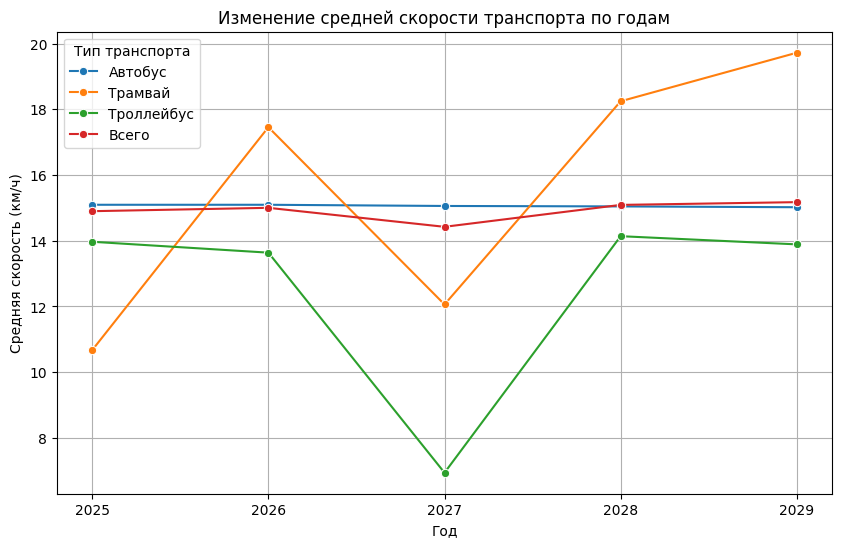

In [55]:

# Создаем линейный график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_speed, x='Год', y='Средняя скорость, км/ч', hue='Тип', marker='o')

# Добавляем подписи
plt.title("Изменение средней скорости транспорта по годам")
plt.xlabel("Год")
plt.ylabel("Средняя скорость (км/ч)")
plt.legend(title="Тип транспорта")
plt.grid(True)

plt.xticks(mean_speed['Год'].unique())

# Показываем график
plt.show()

##### Что за фигня в 2027 году?

Что происходило с троллейбусами, которые должны работать в 2027 году:

In [56]:
param_all[(param_all['Маршрут'].isin(['2', '5', '6', '8', '9', '17', '22'])) & (param_all['Тип'] == 'Троллейбус')].sort_values(['Маршрут', 'Год'])


,Маршрут,Тип,Наименование маршрута регулярных перевозок,МК,СК,БК,ОБК,Всего,"Минимальный интервал движения, мин","Время рейса (оборотного), мин","Протяженность маршрута (туда и обратно), км",Год,"Средняя скорость, км/ч",Вместимость
101,17,Троллейбус,Ц. Рынок – Стройгородок,0,0,8,0,8,11,88.0,20.10,2025,13.704545,720
201,17,Троллейбус,Ц. Рынок – Стройгородок,0,0,8,0,8,11,88.0,20.10,2026,13.704545,720
300,17,Троллейбус,Ц. Рынок – Стройгородок,0,0,8,0,8,11,88.0,10.05,2027,6.852273,720
399,17,Троллейбус,Ц. Рынок – Стройгородок,0,0,8,0,8,11,88.0,20.10,2028,13.704545,720
500,17,Троллейбус,Ц. Рынок – Стройгородок,0,0,8,0,8,11,88.0,20.10,2029,13.704545,720
94,2,Троллейбус,Приг. ЖДВ – ул. 35-я Линия,0,0,9,0,9,8,69.0,14.10,2025,11.750000,810
196,2,Троллейбус,Приг. ЖДВ – ул. 35-я Линия,0,0,9,0,9,8,69.0,14.10,2026,11.750000,810
295,2,Троллейбус,Приг. ЖДВ – ул. 35-я Линия,0,0,9,0,9,8,69.0,7.05,2027,5.875000,810
394,2,Троллейбус,Приг. ЖДВ – ул. 35-я Линия,0,0,9,0,9,8,69.0,14.10,2028,11.750000,810
494,2,Троллейбус,Приг. ЖДВ – ул. 35-я Линия,0,0,9,0,9,8,69.0,14.10,2029,11.750000,810


Видно, что у всех троллейбусов протяженность маршрутов в 2027 ровно в 2 раза меньше, чем в 2028. Похоже, это очередная ошибка в исходных данных. Для маршрута №8 это не так очевидно, поскольку он менялся и в 2027 и в 2028 годах. но будем считать, что проблема там такая же. Попробуем это испраивить:

In [57]:
param_all.loc[(param_all['Год'] == 2027) & (param_all['Тип'] == 'Троллейбус'), 'Протяженность маршрута (туда и обратно), км'] *= 2
calculate_mean_speed()

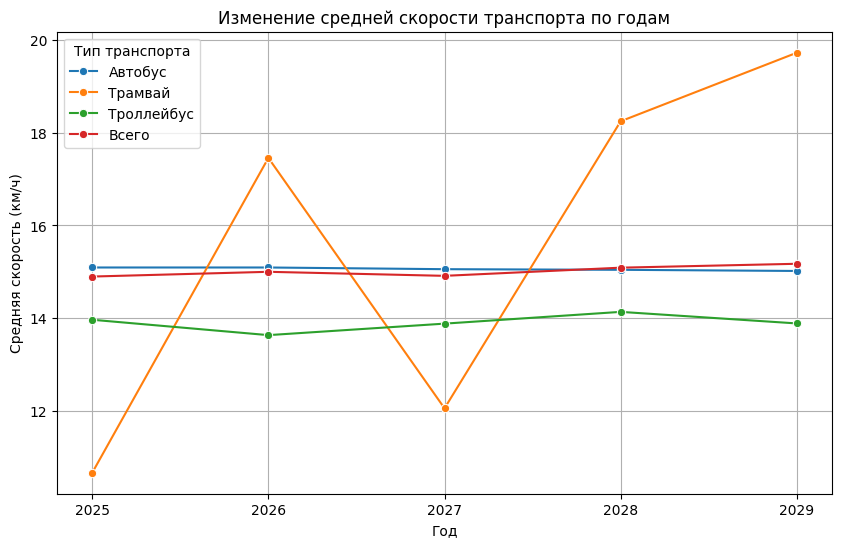

In [58]:
mean_speed = param_all.groupby(['Год', 'Тип'])['Средняя скорость, км/ч'].mean().reset_index()
mean_speed_year = param_all.groupby('Год')['Средняя скорость, км/ч'].mean().reset_index()
mean_speed_year['Тип'] = "Всего"
mean_speed = pd.concat([mean_speed, mean_speed_year], ignore_index=True)

# Создаем линейный график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_speed, x='Год', y='Средняя скорость, км/ч', hue='Тип', marker='o')

# Добавляем подписи
plt.title("Изменение средней скорости транспорта по годам")
plt.xlabel("Год")
plt.ylabel("Средняя скорость (км/ч)")
plt.legend(title="Тип транспорта")
plt.grid(True)

plt.xticks(mean_speed['Год'].unique())

# Показываем график
plt.show()

А теперь посмотрим на трамваи

In [59]:
#param_all[(param_all['Маршрут'].isin(['10', '12'])) & (param_all['Тип'] == 'Трамвай')].sort_values(['Маршрут', 'Год'])
param_all[(param_all['Тип'] == 'Трамвай')].sort_values(['Маршрут', 'Год'])

,Маршрут,Тип,Наименование маршрута регулярных перевозок,МК,СК,БК,ОБК,Всего,"Минимальный интервал движения, мин","Время рейса (оборотного), мин","Протяженность маршрута (туда и обратно), км",Год,"Средняя скорость, км/ч",Вместимость
91,1,Трамвай,Гл. ЖДВ – Госпиталь,0,0,7,0,7,13,90.0,15.2,2025,10.021978,833
390,1,Трамвай,Гл. ЖДВ – Сельмаш,0,0,3,0,3,23,70.0,18.5,2028,16.086957,357
488,1,Трамвай,Гл. ЖДВ – Старый аэропорт,0,0,0,16,16,6,98.5,28.2,2029,17.625000,3040
293,10,Трамвай,Центральный рынок - Площадь Мичурина,0,0,3,0,3,22,52.1,13.4,2027,12.181818,357
391,10,Трамвай,Госпиталь - Площадь Мичурина,0,0,6,0,6,15,90.9,24.5,2028,16.333333,714
489,10,Трамвай,Госпиталь - Площадь Мичурина,0,0,6,0,6,15,90.9,24.5,2029,16.333333,714
392,11,Трамвай,Госпиталь - Мкр. Левенцовский,0,0,0,17,17,7,112.9,36.8,2028,18.554622,3230
490,11,Трамвай,Госпиталь - Мкр. Левенцовский,0,0,0,17,17,7,112.9,36.8,2029,18.554622,3230
194,12,Трамвай,Центральный рынок - Мкр. Левенцовский,0,0,11,0,11,10,112.7,32.0,2026,17.454545,1309
294,12,Трамвай,Сельмаш - Мкр. Левенцовский,0,0,8,33,41,5,130.6,40.8,2027,11.941463,7222


Проблема в неожиданно низкой скорости трамвая №12. На ошибку протяженности, как с троллейбусами, это не похоже. Если сравнивать с 2028 годом, то они собираются сократить количество техники более чем в 2 раза, сохранив при этом такие же интервалы движения, что выглядит нереалистично. При таком количестве техники в 2027 году, интервалы должны быть около 2 минут.

#### С учетом количества транспортных средств

В предыдущем разделе мы смотрели среднюю скорость по маршрутам. Но не все маршруты одинаково полезны. Попробуем сделать то же самое с учетом количества транспорта на маршруте.

In [60]:
# Группировка по году и типу транспорта
weighted_speed = param_all.groupby(['Год', 'Тип'])[['Средняя скорость, км/ч', 'Всего']].apply(
    lambda x: (x['Средняя скорость, км/ч'] * x['Всего']).sum() /
              x['Всего'].sum()
).reset_index(name='Средняя скорость ТС (взвешенная)')

# Группировка по году
weighted_speed_year = param_all.assign(
    weighted_speed=param_all['Средняя скорость, км/ч'] * param_all['Всего']
).groupby('Год', as_index=False).agg(**{
    'Средняя скорость ТС (взвешенная)' : ('weighted_speed', 'sum')},
    Количество_ТС=('Всего', 'sum')
)

weighted_speed_year['Средняя скорость ТС (взвешенная)'] /= weighted_speed_year['Количество_ТС']
weighted_speed_year['Тип'] = "Всего"
weighted_speed_year.drop(columns=['Количество_ТС'], inplace=True)

weighted_speed = pd.concat([weighted_speed, weighted_speed_year], ignore_index=True)
weighted_speed

,Год,Тип,Средняя скорость ТС (взвешенная)
0,2025,Автобус,15.006850
1,2025,Трамвай,10.311879
2,2025,Троллейбус,13.687184
3,2026,Автобус,15.006850
4,2026,Трамвай,17.454545
5,2026,Троллейбус,13.497513
6,2027,Автобус,15.026658
7,2027,Трамвай,11.957851
8,2027,Троллейбус,13.888865
9,2028,Автобус,14.999444


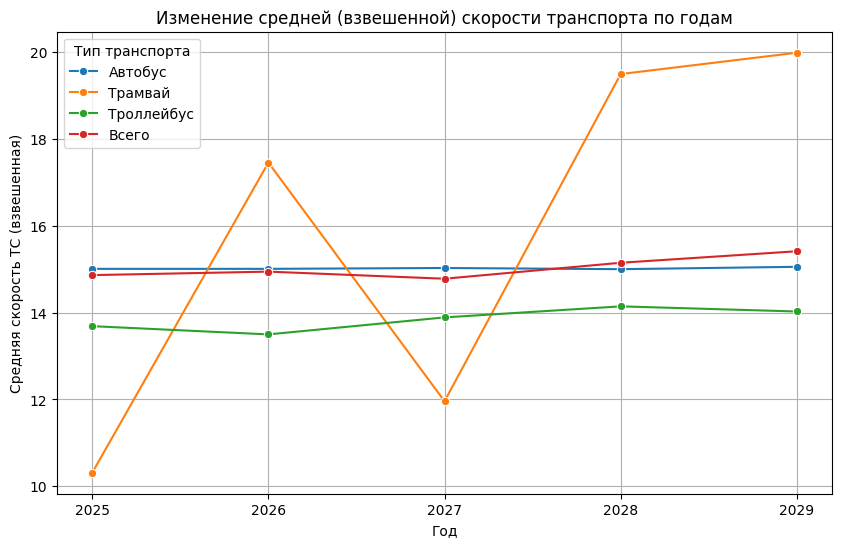

In [61]:
# Создаем линейный график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=weighted_speed, x='Год', y='Средняя скорость ТС (взвешенная)', hue='Тип', marker='o')

# Добавляем подписи
plt.title("Изменение средней (взвешенной) скорости транспорта по годам")
plt.xlabel("Год")
plt.ylabel("Средняя скорость ТС (взвешенная)")
plt.legend(title="Тип транспорта")
plt.grid(True)

plt.xticks(weighted_speed['Год'].unique())

# Показываем график
plt.show()

Выводы по скорости:
- если не считать прогресс трамваев, общий рост средней скорости крайне мал.
- средняя скорость транспорта растёт с 14.8 км/ч до 15.4 км/ч. Мало. В документе планирования заявлен рост средней скорости с 16.2 до 17. Тоже мало. Откуда такая разница - не понятно, возможно, я не доконца понял методику её расчета.
- множественные мероприятия, направленные на рост скорости транспорта в 2025 году (организация выделенных полос), на среднюю скорость никак не влияют. По крайней мере, это следует из параметров работы маршрутов. Также не видно никаких изменений в параметрах маршрутов, явно затрагиваемых этими изменениями. Насколько я понимаю, основной задачей авторов документа, была разработка модели движения транспорта. Эти цифры, явно, не результат моделирования.

### Вместимость

In [62]:
capacity = param_all.groupby(['Год', 'Тип'])['Вместимость'].sum().reset_index()
capacity_year = param_all.groupby('Год')['Вместимость'].sum().reset_index()
capacity_year['Тип'] = "Всего"
capacity = pd.concat([capacity, capacity_year], ignore_index=True)
capacity

,Год,Тип,Вместимость
0,2025,Автобус,59793
1,2025,Трамвай,1071
2,2025,Троллейбус,5310
3,2026,Автобус,59793
4,2026,Трамвай,1309
5,2026,Троллейбус,4770
6,2027,Автобус,57683
7,2027,Трамвай,7579
8,2027,Троллейбус,5940
9,2028,Автобус,55613


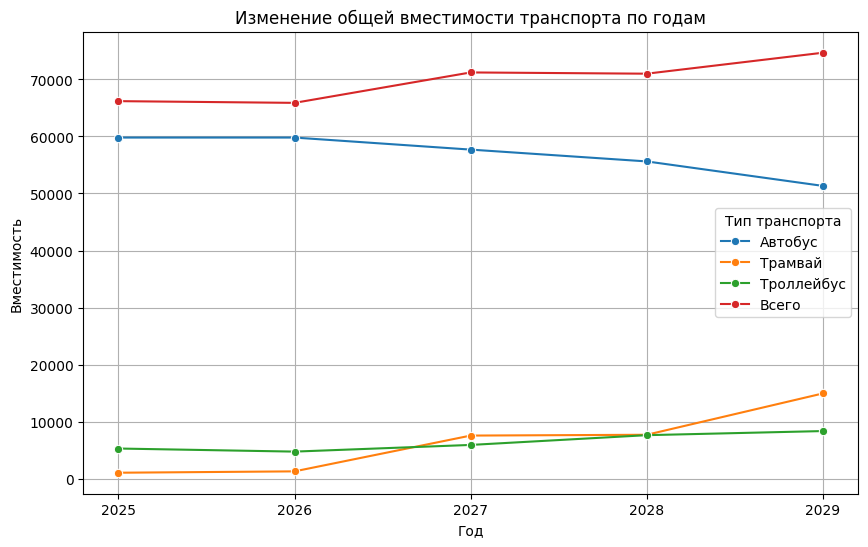

In [64]:
# Создаем линейный график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=capacity, x='Год', y='Вместимость', hue='Тип', marker='o')

# Добавляем подписи
plt.title("Изменение общей вместимости транспорта по годам")
plt.xlabel("Год")
plt.ylabel("Вместимость")
plt.legend(title="Тип транспорта")
plt.grid(True)

plt.xticks(capacity['Год'].unique())

# Показываем график
plt.show()

In [68]:
#Общий рост в процентах:
(74657 - 66174) / 66174 * 100

12.819234140296793

Итоговый прирост вместимости общественного транспорта за 5 лет менее 13%. При этом в документе планирования предполагается рост доли поездок на общественно транспорте на 10% (с 30% до 33%). Т.е. осноную, на текущий момент проблему - переполненности транспорта, никто решать и не планирует.

И это ещё без учета роста численности населения за этот период.

### Интервалы

In [70]:
interval = param_all.groupby(['Год', 'Тип'])['Минимальный интервал движения, мин'].mean().reset_index()
interval_year = param_all.groupby('Год')['Минимальный интервал движения, мин'].mean().reset_index()
interval_year['Тип'] = "Всего"
interval = pd.concat([interval, interval_year], ignore_index=True)
interval

,Год,Тип,"Минимальный интервал движения, мин"
0,2025,Автобус,20.538462
1,2025,Трамвай,31.000000
2,2025,Троллейбус,18.100000
3,2026,Автобус,20.538462
4,2026,Трамвай,10.000000
5,2026,Троллейбус,16.125000
6,2027,Автобус,19.766667
7,2027,Трамвай,13.500000
8,2027,Троллейбус,10.000000
9,2028,Автобус,19.897727


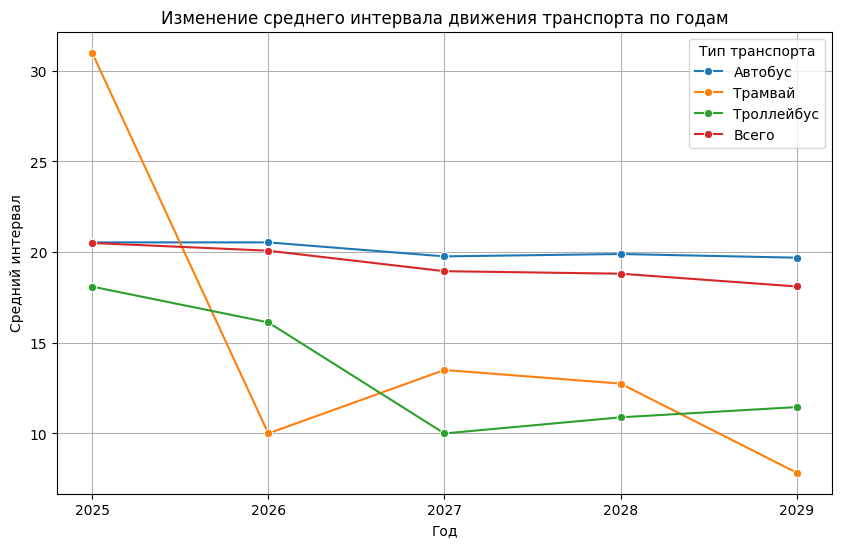

In [72]:
# Создаем линейный график с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=interval, x='Год', y='Минимальный интервал движения, мин', hue='Тип', marker='o')

# Добавляем подписи
plt.title("Изменение среднего интервала движения транспорта по годам")
plt.xlabel("Год")
plt.ylabel("Средний интервал")
plt.legend(title="Тип транспорта")
plt.grid(True)

plt.xticks(interval['Год'].unique())

# Показываем график
plt.show()

Трамваи, конечно, молодцы, Но в целом мы не такого прогресса ожидали. А с учетом того, что новая маршрутная сеть явно предполагает бОльшее количество пересадок, всё становиться ещё хуже.

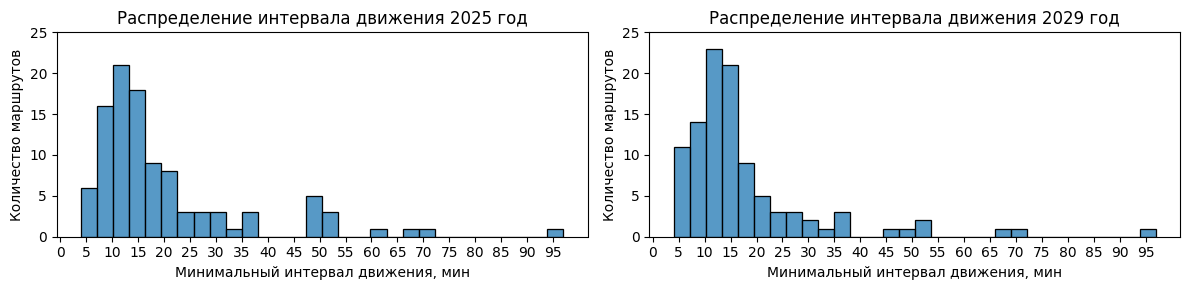

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3)) 

# Первый график (2025 год)
sns.histplot(param25['Минимальный интервал движения, мин'], bins=30, ax=axes[0])
axes[0].set_title('Распределение интервала движения 2025 год')
axes[0].set_ylabel("Количество маршрутов")
axes[0].set_xticks(np.arange(0, 100, 5))
axes[0].set_yticks(np.arange(0, 30, 5))

# Второй график (2029 год)
sns.histplot(param29['Минимальный интервал движения, мин'], bins=30, ax=axes[1])
axes[1].set_title('Распределение интервала движения 2029 год')
axes[1].set_ylabel("Количество маршрутов")
axes[1].set_xticks(np.arange(0, 100, 5))
axes[1].set_yticks(np.arange(0, 30, 5))

# Отображаем графики
plt.tight_layout()  
plt.show()

Несмотря на позитивную динамику для основных магистральных маршрутов, у нас всё равно остаются десятки маршрутов с интервалом движения более 15 минут, чего в эффективной транспортной системе быть не должно. Кроме того, если посмотреть на их состав в 25-м и 29-м году, то это будут одни и те же маршруты с такими же параметрами. На них просто забили.